# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Add Fog and Haze to all the videos

In [2]:
### Function to add Fog
def add_fog(frame, intensity=0.5):
    """
    Apply a fog effect by adding a white overlay on the frame.
    The intensity parameter controls the opacity of the fog.
    """
    fog = np.ones_like(frame, dtype=np.uint8) * 255  # White overlay
    foggy_frame = cv2.addWeighted(frame, 1 - intensity, fog, intensity, 0)
    return foggy_frame

### Function to add Haze
def add_haze(frame, contrast=0.5, blur_amount=5):
    """
    Apply a haze effect by reducing contrast and adding blur.
    contrast: controls how much to reduce the contrast.
    blur_amount: controls the level of blur added.
    """
    # Reduce contrast
    haze_frame = cv2.addWeighted(frame, contrast, np.zeros_like(frame, frame.dtype), 0, 0)
    # Apply blur
    haze_frame = cv2.GaussianBlur(haze_frame, (blur_amount, blur_amount), 0)
    return haze_frame

### Process videos to add fog and haze (environmental factors)
def process_video(input_video_path, output_video_path, fog_intensity=0.5, haze_contrast=0.5, haze_blur=5):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)

    # Get frame dimensions and FPS
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create a VideoWriter object to save the output video
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    # Process each frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Apply fog and haze effects
        foggy_frame = add_fog(frame, intensity=fog_intensity)
        foggy_hazy_frame = add_haze(foggy_frame, contrast=haze_contrast, blur_amount=haze_blur)

        # Write the processed frame to the output video
        out.write(foggy_hazy_frame)

    # Release the video objects
    cap.release()
    out.release()
    #cv2.destroyAllWindows()

### Function to process all the videos present in the folder
def process_videos_in_folder(input_folder, output_folder, fog_intensity=0.5, haze_contrast=0.5, haze_blur=5):
    """
    Process all videos in the input folder, apply fog and haze effects, and save them in the output folder.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all video files in the input folder
    for video_file in os.listdir(input_folder):
        if video_file.endswith('.mp4') or video_file.endswith('.mov'):
            input_video_path = os.path.join(input_folder, video_file)
            output_video_path = os.path.join(output_folder, 'fog_haze_' + video_file)
            print(f'Processing video: {video_file}')
            process_video(input_video_path, output_video_path, fog_intensity, haze_contrast, haze_blur)
            print(f'Saved processed video: {output_video_path}')

# Define input and output folders
input_folder = 'CCtv Data'  # Folder containing original videos
output_folder = 'CCtv Data w Fog and Haze'  # Folder to save processed videos

# Apply fog and haze to all videos in the folder
process_videos_in_folder(input_folder, output_folder)


Processing video: Abuse001_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse001_x264.mp4
Processing video: Abuse002_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse002_x264.mp4
Processing video: Abuse003_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse003_x264.mp4
Processing video: Abuse004_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse004_x264.mp4
Processing video: Abuse005_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse005_x264.mp4
Processing video: Abuse006_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse006_x264.mp4
Processing video: Abuse007_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse007_x264.mp4
Processing video: Abuse008_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse008_x264.mp4
Processing video: Abuse009_x264.mp4
Saved processed video: CCtv Data w Fog and Haze\fog_haze_Abuse009_x264.mp4
P

# Creating labels for the videos

In [3]:
videos = []
video_folder = 'CCtv Data'
for video_file in os.listdir(video_folder):
        if video_file.endswith('.mp4') or video_file.endswith('.mov'):
            input_video_path = os.path.join(video_file)
            videos.append(input_video_path)

In [4]:
videos

['Abuse001_x264.mp4',
 'Abuse002_x264.mp4',
 'Abuse003_x264.mp4',
 'Abuse004_x264.mp4',
 'Abuse005_x264.mp4',
 'Abuse006_x264.mp4',
 'Abuse007_x264.mp4',
 'Abuse008_x264.mp4',
 'Abuse009_x264.mp4',
 'Abuse010_x264.mp4',
 'Abuse011_x264.mp4',
 'Abuse012_x264.mp4',
 'Abuse013_x264.mp4',
 'Abuse014_x264.mp4',
 'Abuse015_x264.mp4',
 'Abuse016_x264.mp4',
 'Abuse017_x264.mp4',
 'Abuse018_x264.mp4',
 'Abuse019_x264.mp4',
 'Abuse020_x264.mp4',
 'Abuse021_x264.mp4',
 'Abuse022_x264.mp4',
 'Abuse023_x264.mp4',
 'Abuse024_x264.mp4',
 'Abuse025_x264.mp4',
 'Abuse026_x264.mp4',
 'Abuse027_x264.mp4',
 'Abuse028_x264.mp4',
 'Abuse029_x264.mp4',
 'Abuse030_x264.mp4',
 'Abuse031_x264.mp4',
 'Abuse032_x264.mp4',
 'Abuse033_x264.mp4',
 'Abuse034_x264.mp4',
 'Abuse035_x264.mp4',
 'Abuse036_x264.mp4',
 'Abuse037_x264.mp4',
 'Abuse038_x264.mp4',
 'Abuse039_x264.mp4',
 'Abuse040_x264.mp4',
 'Abuse041_x264.mp4',
 'Abuse042_x264.mp4',
 'Abuse043_x264.mp4',
 'Abuse044_x264.mp4',
 'Abuse045_x264.mp4',
 'Abuse046

In [5]:
videos_v2 = []
video_folder_v2 = 'CCtv Data w Fog and Haze'
for video_file in os.listdir(video_folder_v2):
        if video_file.endswith('.mp4') or video_file.endswith('.mov'):
            input_video_path = os.path.join(video_file)
            videos_v2.append(input_video_path)

In [6]:
videos_v2

['fog_haze_Abuse001_x264.mp4',
 'fog_haze_Abuse002_x264.mp4',
 'fog_haze_Abuse003_x264.mp4',
 'fog_haze_Abuse004_x264.mp4',
 'fog_haze_Abuse005_x264.mp4',
 'fog_haze_Abuse006_x264.mp4',
 'fog_haze_Abuse007_x264.mp4',
 'fog_haze_Abuse008_x264.mp4',
 'fog_haze_Abuse009_x264.mp4',
 'fog_haze_Abuse010_x264.mp4',
 'fog_haze_Abuse011_x264.mp4',
 'fog_haze_Abuse012_x264.mp4',
 'fog_haze_Abuse013_x264.mp4',
 'fog_haze_Abuse014_x264.mp4',
 'fog_haze_Abuse015_x264.mp4',
 'fog_haze_Abuse016_x264.mp4',
 'fog_haze_Abuse017_x264.mp4',
 'fog_haze_Abuse018_x264.mp4',
 'fog_haze_Abuse019_x264.mp4',
 'fog_haze_Abuse020_x264.mp4',
 'fog_haze_Abuse021_x264.mp4',
 'fog_haze_Abuse022_x264.mp4',
 'fog_haze_Abuse023_x264.mp4',
 'fog_haze_Abuse024_x264.mp4',
 'fog_haze_Abuse025_x264.mp4',
 'fog_haze_Abuse026_x264.mp4',
 'fog_haze_Abuse027_x264.mp4',
 'fog_haze_Abuse028_x264.mp4',
 'fog_haze_Abuse029_x264.mp4',
 'fog_haze_Abuse030_x264.mp4',
 'fog_haze_Abuse031_x264.mp4',
 'fog_haze_Abuse032_x264.mp4',
 'fog_ha

# Splitting the dataset into Train and Test

In [ ]:
# Paths
frames_folder = 'Normalized_Frames'  # Folder containing normalized frames
labels_file = 'Frame_Labels.csv'  # CSV file with frame labels

# Load labels from CSV
labels_df = pd.read_csv(labels_file)

# Initialize empty lists to store frames and labels
frames = []
labels = []

# Load frames and corresponding labels
for index, row in labels_df.iterrows():
    frame_path = os.path.join(frames_folder, row['Frame Name'])
    frame = cv2.imread(frame_path)
    
    if frame is not None:
        frames.append(frame)
        labels.append(0 if row['Label'] == 'Normal' else 1)  # Convert label to binary (0 or 1)

# Convert to NumPy arrays
frames = np.array(frames)
labels = np.array(labels)

# Split into training and testing sets (e.g., 70% training, 15% validation, 15% testing)
X_train, X_temp, y_train, y_temp = train_test_split(frames, labels, test_size=0.3, random_state=42, stratify=labels)

# Further split the remaining 30% into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the sizes
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



# Training

In [ ]:
# Define a simple CNN model for image classification
def build_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build and compile the model
input_shape = (224, 224, 3)  # Modify based on actual frame shape
model = build_cnn_model(input_shape)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [13]:
# Path to the folder containing the normalized frames
frames_folder = 'Normalized_Frames'

# Get the list of all files in the folder
frames_list = os.listdir(frames_folder)

# Filter out non-image files (if necessary)
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.mp4')  # Add or modify as needed
frames_list = [f for f in frames_list if f.lower().endswith(image_extensions)]

# Count the number of frames
num_frames = len(frames_list)
num_frames

103684

In [9]:
# Run a Python script
%run Resizing_Script.py

Resizing Abuse001_x264.mp4...
Resized Abuse001_x264.mp4 saved to Resized_Videos\Abuse001_x264.mp4.
Resizing Abuse002_x264.mp4...
Resized Abuse002_x264.mp4 saved to Resized_Videos\Abuse002_x264.mp4.
Resizing Abuse003_x264.mp4...
Resized Abuse003_x264.mp4 saved to Resized_Videos\Abuse003_x264.mp4.
Resizing Abuse004_x264.mp4...
Resized Abuse004_x264.mp4 saved to Resized_Videos\Abuse004_x264.mp4.
Resizing Abuse005_x264.mp4...
Resized Abuse005_x264.mp4 saved to Resized_Videos\Abuse005_x264.mp4.
Resizing Abuse006_x264.mp4...
Resized Abuse006_x264.mp4 saved to Resized_Videos\Abuse006_x264.mp4.
Resizing Abuse007_x264.mp4...
Resized Abuse007_x264.mp4 saved to Resized_Videos\Abuse007_x264.mp4.
Resizing Abuse008_x264.mp4...
Resized Abuse008_x264.mp4 saved to Resized_Videos\Abuse008_x264.mp4.
Resizing Abuse009_x264.mp4...
Resized Abuse009_x264.mp4 saved to Resized_Videos\Abuse009_x264.mp4.
Resizing Abuse010_x264.mp4...
Resized Abuse010_x264.mp4 saved to Resized_Videos\Abuse010_x264.mp4.
Resizing A

In [10]:
%run Extract_Frames.py

Extracted and sampled 910 frames from Abuse001_x264
Extracted and sampled 289 frames from Abuse002_x264
Extracted and sampled 1233 frames from Abuse003_x264
Extracted and sampled 5598 frames from Abuse004_x264
Extracted and sampled 317 frames from Abuse005_x264
Extracted and sampled 1460 frames from Abuse006_x264
Extracted and sampled 384 frames from Abuse007_x264
Extracted and sampled 2802 frames from Abuse008_x264
Extracted and sampled 334 frames from Abuse009_x264
Extracted and sampled 378 frames from Abuse010_x264
Extracted and sampled 1216 frames from Abuse011_x264
Extracted and sampled 1710 frames from Abuse012_x264
Extracted and sampled 1623 frames from Abuse013_x264
Extracted and sampled 864 frames from Abuse014_x264
Extracted and sampled 2625 frames from Abuse015_x264
Extracted and sampled 469 frames from Abuse016_x264
Extracted and sampled 640 frames from Abuse017_x264
Extracted and sampled 810 frames from Abuse018_x264
Extracted and sampled 1315 frames from Abuse019_x264
Ext

In [1]:
# Path to the folder containing the normalized frames
import os
frames_folder = 'Grayscale_Frames'

# Get the list of all files in the folder
frames_list = os.listdir(frames_folder)

# Filter out non-image files (if necessary)
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.mp4')  # Add or modify as needed
frames_list = [f for f in frames_list if f.lower().endswith(image_extensions)]

# Count the number of frames
num_frames = len(frames_list)
num_frames

34572

In [11]:
%run Normalize_Frames.py

All frames have been normalized and saved.


In [13]:
%run Labels.py

Labels.csv file has been created with 350 entries.


In [14]:
%run Associate_Frame_Labels.py  #creates labels

In [15]:
%run Grayscale_conversion.py

Frames converted to grayscale and saved in Grayscale_Frames


In [16]:
%run Train_test_split.py

Dataset split done. Train: 360139, Val: 77173, Test: 77173


# MODEL TRAIN

In [2]:
%run Model_Training_v2.py 

Found 359910 images belonging to 2 classes.
Found 77162 images belonging to 2 classes.


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, None, 112, 112, │           160 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, None, 112, 112, │            64 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, None, 56, 56,   │             0 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, None, 56, 56,   │         4,640 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, None, 56, 56,   │           128 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, None, 28, 28,   │             0 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, None, 25088)    │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, None, 25088)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │     3,215,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,221,569 (12.29 MB)

 Trainable params: 3,221,473 (12.29 MB)

 Non-trainable params: 96 (384.00 B)

9646/9646 ━━━━━━━━━━━━━━━━━━━━ 415s 42ms/step
— val_precision: 0.4177 — val_recall: 0.4150 — val_f1: 0.4164
44989/44989 ━━━━━━━━━━━━━━━━━━━━ 42828s 950ms/step - accuracy: 0.8909 - loss: 0.2560 - precision_1: 0.8789 - recall_1: 0.8573 - val_accuracy: 0.9506 - val_loss: 0.1302 - val_precision_1: 0.9443 - val_recall_1: 0.9381


Training complete. Model saved.


# CONFSUION MATRIX


Found 77163 images belonging to 2 classes.
   3/9645 ━━━━━━━━━━━━━━━━━━━━ 8:59 56ms/step - accuracy: 1.0000 - loss: 0.0021 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00   

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9645/9645 ━━━━━━━━━━━━━━━━━━━━ 727s 74ms/step - accuracy: 0.9534 - loss: 0.1258 - precision_1: 0.3456 - recall_1: 0.3753
Evaluation results: [0.1284499168395996, 0.9495075345039368, 0.9435523748397827, 0.936181366443634]
9646/9646 ━━━━━━━━━━━━━━━━━━━━ 455s 46ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     44646
           1       0.94      0.94      0.94     32517

    accuracy                           0.95     77163
   macro avg       0.95      0.95      0.95     77163
weighted avg       0.95      0.95      0.95     77163



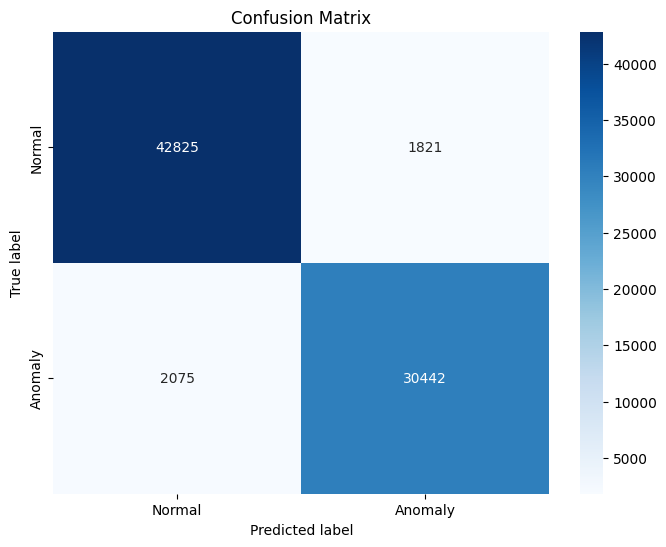

In [3]:
#On the validation set with 75k frames

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
# model = load_model('CNN_LSTM_AAA2.h5')
model = load_model('cnn_lstm_model_optimized_reduced.h5')

# Prepare the test data generator (ensure it matches training preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'data_split/test',  # Directory containing test images
    target_size=(112,112),  # Resize images to match model input size
    color_mode='grayscale',  # Change if using RGB images
    batch_size=8,
    class_mode='binary',  # Use 'binary' for binary classification with one output unit
    shuffle=False  # Important for evaluation and prediction
)

# Evaluate the model on the test set
results = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Print results
print("Evaluation results:", results)

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary class labels

# Get true labels from the generator
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, predicted_classes))

# Plot confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# User Interface in UI Folder 
